# Problem Statement 
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 
 
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know: 

 Which variables are significant in predicting the price of a car

 How well those variables describe the price of a car 

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market. 

# Importing libraries

In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

#importing sklearn libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#importing statsmodel api module
import statsmodels.api as sm

#importing warnings
from warnings import filterwarnings
filterwarnings('ignore')
sb.set_style("darkgrid")


In [2]:
pd.options.display.max_columns = 40

In [3]:
#Reading dataset
df=pd.read_csv(r"CarPrice_Assignment.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
#Checking the Null Values %age
round(((df.isna().sum() / df.shape[0]) * 100),2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

# Data Preparation 
There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building

### Checking the CarName column


In [7]:
#Splitting the CarName COlumn
df.CarName=df.CarName.apply(lambda x:x.split(" ")[0])

In [8]:
#Checking the unique values
df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

We have seen that few of the CarName are misspelled, so correcting them

In [9]:
df.CarName.replace({"maxda":"mazda","vokswagen":"volkswagen","vw":"volkswagen","Nissan":"nissan","porcshce":"porsche","toyouta":"toyota"},inplace=True)

### Checking the doornumber column

In [10]:
df.doornumber.unique()

array(['two', 'four'], dtype=object)

In [11]:
#mapping the door number from object to numerical
df.doornumber=df.doornumber.replace({"two":2,"four":4}).astype(np.int64)

### Checking the drivewheel column

In [12]:
df.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

### Checking the cylindernumber column

In [13]:
df.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [14]:
#mapping the object columns to numericals
df.cylindernumber=df.cylindernumber.map({"four":4,"six":6,"five":5,"three":3,"twelve":12,"two":2,"eight":8}).astype(np.int64)

In [15]:
df.cylindernumber.unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

# Data Visualising And Finding Insights  (EDA's)

First plotting the categorical columns

#### Now Checking the The price distribution of ```fueltype``` ,```aspiration``` and ```doornumber``` and their counts

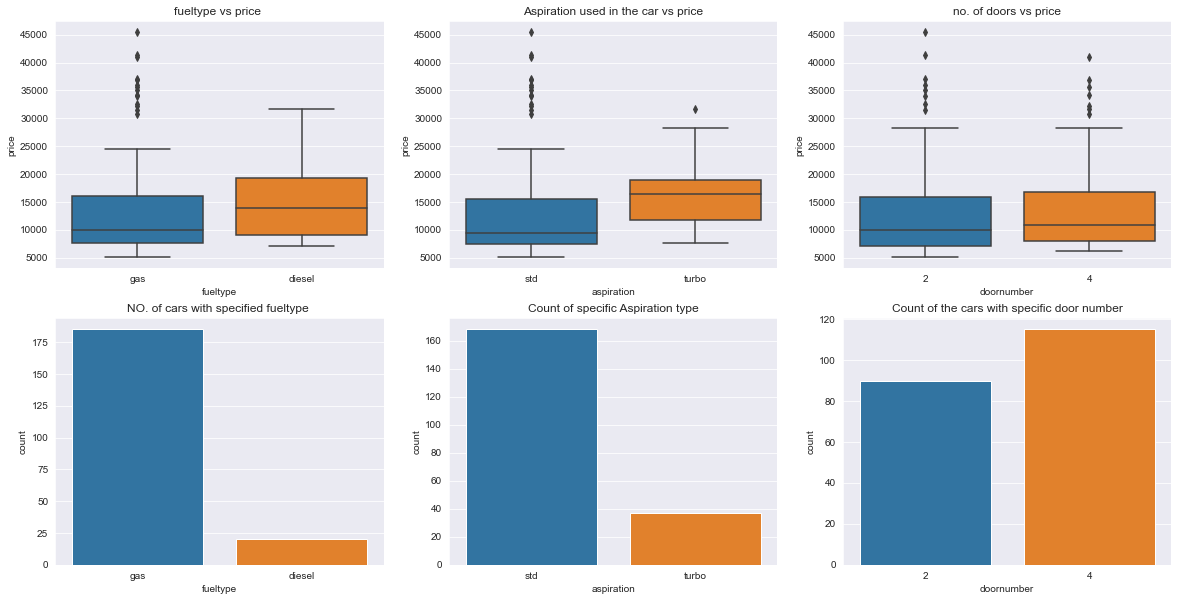

In [16]:
plt.figure(figsize=(20,10))

#FUELTYPE

# fueltye vs price distribution
plt.subplot(2,3,1)
plt.title("fueltype vs price ")
sb.boxplot(df.fueltype,df.price)
#count 
plt.subplot(2,3,4)
plt.title("NO. of cars with specified fueltype ")
sb.countplot(df.fueltype)

#ASPIRATION

#aspiration vs price disribution
plt.subplot(2,3,2)
plt.title("Aspiration used in the car vs price")
sb.boxplot(df.aspiration,df.price)
#count
plt.subplot(2,3,5)
plt.title("Count of specific Aspiration type")
sb.countplot(df.aspiration)

#DOORNUMBER

#doornumber vs price distribution
plt.subplot(2,3,3)
plt.title("no. of doors vs price")
sb.boxplot(df.doornumber,df.price)
#count
plt.subplot(2,3,6)
plt.title("Count of the cars with specific door number")
sb.countplot(df.doornumber)

We have seen that diesel cars have a significantly higher price but they have very few numbers                                 
Turbo aspiration have a higher price bue usually implemented in less cars                                                       
Door numbers doesnot to be vary in price but 4 Doors cars are more bought

#### Now Analysing the carbody with price

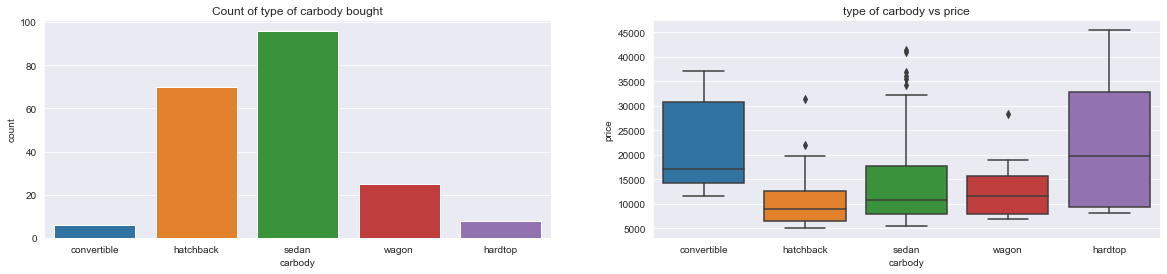

In [17]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.title("Count of type of carbody bought")
sb.countplot(df.carbody)
plt.subplot(1,2,2)
plt.title("type of carbody vs price")
sb.boxplot(df.carbody,df.price)

Again we have seen the same variation that high price carbody type is usually bought less 

#### Cheking which enginelocation and enginetype is more preferred

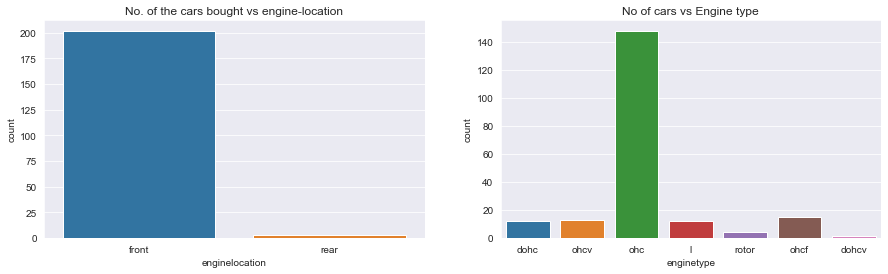

In [18]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title("No. of the cars bought vs engine-location")
sb.countplot(df.enginelocation)
plt.subplot(1,2,2)
plt.title("No of cars vs Engine type")
sb.countplot(df.enginetype)

#### There is a huge amount of cars bougth whose Engine Location is ```FRONT``` and Engine Type is ```OHC```

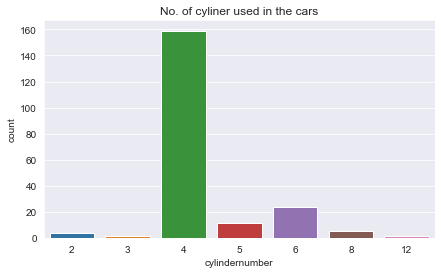

In [19]:
plt.figure(figsize=(7,4))
plt.title("No. of cyliner used in the cars")
sb.countplot(df.cylindernumber)


#### Cars having 4 cylinders are bought most

#### Now checking which fuelsystem is used the most and also checking its distribution

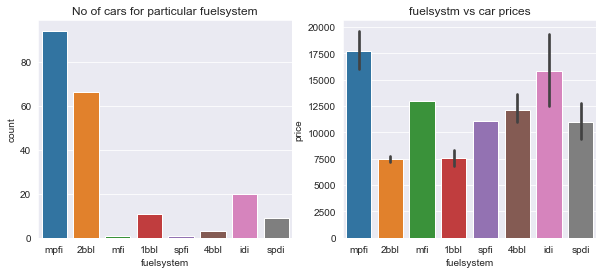

In [20]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("No of cars for particular fuelsystem")
sb.countplot(df.fuelsystem)
plt.subplot(1,2,2)
plt.title("fuelsystm vs car prices")
sb.barplot(df.fuelsystem,df.price)

#### From above graph we have seen that mpfi have a bit high price and its count is max so we can also opt for ```2bbi``` as fuelsystem in tems of price and its usage

### Now analysisng the numericals columns

In [21]:
int_vars=df.select_dtypes(exclude="object")

In [22]:
int_vars.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [23]:
nvars=int_vars.drop(labels=["car_ID","cylindernumber","price"],axis=1)

In [24]:
cols=list(nvars.columns)

### plotting a pairplot for the numerical columns vs price column

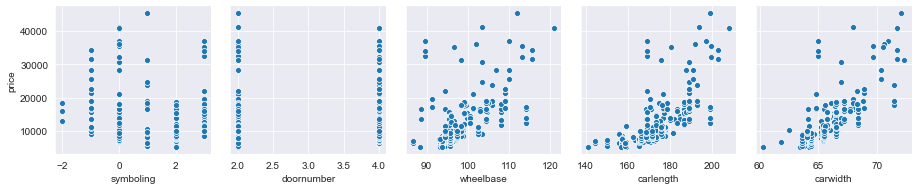

In [25]:
#sb.pairplot(data=df,x_vars=cols,y_vars=df.price)
sb.pairplot(data=df,x_vars=cols[:5],y_vars="price")

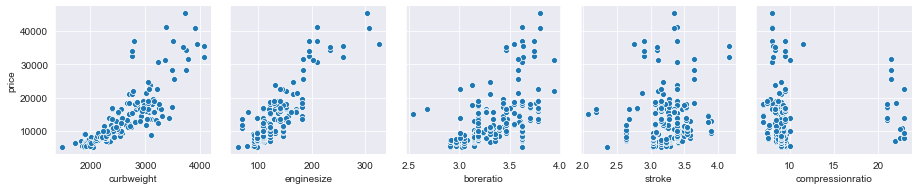

In [26]:
sb.pairplot(data=df,x_vars=cols[6:11],y_vars="price")

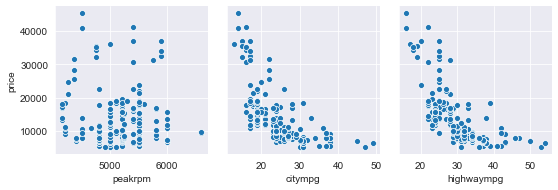

In [27]:
sb.pairplot(data=df,x_vars=cols[12:],y_vars="price")

### Making the correlation map and seeing which variables are most correlated

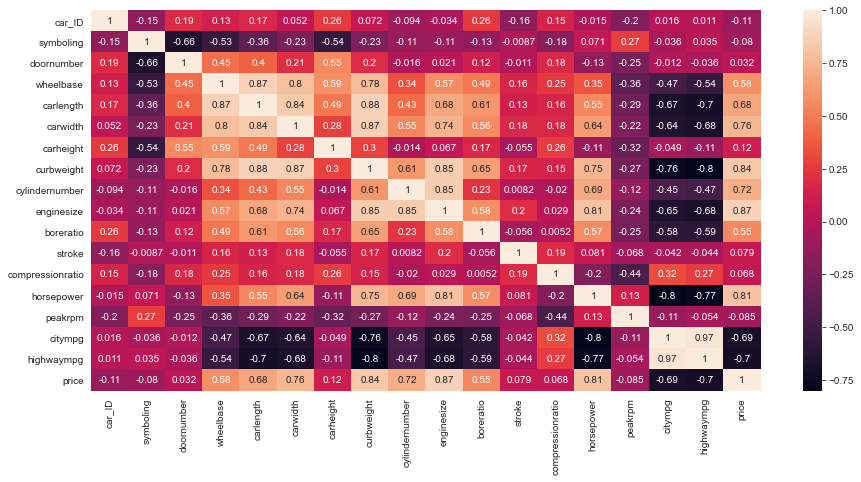

In [28]:
plt.figure(figsize=(15,7))
sb.heatmap(data=df.corr(),annot=True)

### Before dropping the CarName column lets analysze its distributionin acccordance with price

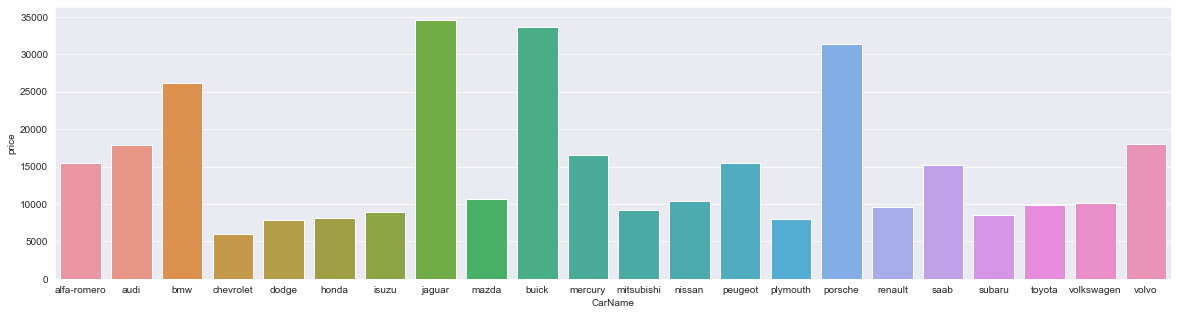

In [29]:
#Checing the price columns and finding the mean price of the sales
plt.figure(figsize=(20,5))
sb.barplot(df.CarName,df.price,ci=False)

We have seen that big companies genrally have a high price for their cars.

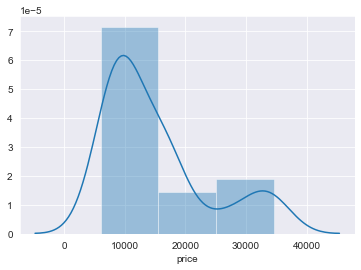

In [30]:
sb.distplot(df.groupby(by="CarName")["price"].mean().sort_values(ascending=False),bins=3)

Here we have seen the clear distribution of price according to car so we can make a new derived matrix called car_category which can have the category of the car according the price fo the car.

In [31]:
def car(x):
    if x>5000 and x<=15000:
        return "Low"
    elif x>15000 and x<=25000:
        return "Medium"
    else :
        return "Hign"

In [32]:
df["car_cat"]=df.price.apply(car)

In [33]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_cat
0,1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Low
1,2,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Medium
2,3,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Medium
3,4,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Low
4,5,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Medium


# CREATING MODEL

### creating dummy variables

In [34]:
#GETTING DUMMIES
dummy_vars=["fueltype","aspiration","carbody","drivewheel","enginelocation","enginetype","fuelsystem","car_cat"]
dummies=pd.get_dummies(data=df[dummy_vars],drop_first=True)

In [35]:
#Dropiing the columns that are of no use to us
df.drop(labels=["car_ID","CarName","fueltype","aspiration","carbody","drivewheel","enginelocation","enginetype","fuelsystem","car_cat"],axis=1,inplace=True)

In [36]:
final_df=pd.concat([df,dummies],axis=1)

In [37]:
final_df.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,carbody_hardtop,...,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_cat_Low,car_cat_Medium
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,...,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


### Train_test_split

In [38]:
#SPLITTING THE DATASET

df_train,df_test=train_test_split(final_df,test_size=0.3,random_state=42)

### Scaling the dataset

In [39]:
#SCALING THE FEATUREs
scale=MinMaxScaler()

In [40]:
df_train.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'fueltype_gas', 'aspiration_turbo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_cat_Low', 'car_cat_Medium'],
      dtype='object')

In [41]:
cols=['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'fueltype_gas', 'aspiration_turbo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_cat_Low', 'car_cat_Medium']

In [42]:
df_train[cols]=scale.fit_transform(df_train[cols])

### Making the target variable and predictor variable

In [43]:
y_train=df_train.pop("price")
X_train=df_train

In [44]:
X_train.shape

(143, 40)

In [45]:
y_train.shape

(143,)

## Building the Model

In [46]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Using the Recursive Feature elimination Technique fior removing the unnecessary columns

In [47]:
rfe=RFE(lm,10)
rfe=rfe.fit(X_train,y_train)

In [48]:
rfe.ranking_

array([18, 19, 29, 26,  1, 11,  4,  5,  1, 30,  8,  1, 13, 14,  1,  1,  9,
       10,  1,  2,  3,  1, 21, 25, 12, 16, 20,  6, 23, 27,  7, 24,  1, 22,
       31, 17, 28, 15,  1,  1])

In [49]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 18),
 ('doornumber', False, 19),
 ('wheelbase', False, 29),
 ('carlength', False, 26),
 ('carwidth', True, 1),
 ('carheight', False, 11),
 ('curbweight', False, 4),
 ('cylindernumber', False, 5),
 ('enginesize', True, 1),
 ('boreratio', False, 30),
 ('stroke', False, 8),
 ('compressionratio', True, 1),
 ('horsepower', False, 13),
 ('peakrpm', False, 14),
 ('citympg', True, 1),
 ('highwaympg', True, 1),
 ('fueltype_gas', False, 9),
 ('aspiration_turbo', False, 10),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', False, 2),
 ('carbody_sedan', False, 3),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 21),
 ('drivewheel_rwd', False, 25),
 ('enginelocation_rear', False, 12),
 ('enginetype_dohcv', False, 16),
 ('enginetype_l', False, 20),
 ('enginetype_ohc', False, 6),
 ('enginetype_ohcf', False, 23),
 ('enginetype_ohcv', False, 27),
 ('enginetype_rotor', False, 7),
 ('fuelsystem_2bbl', False, 24),
 ('fuelsystem_4bbl', True, 1),
 ('fuelsystem_idi', False,

In [50]:
final_cols=X_train.columns[rfe.support_].to_list()

In [51]:
#Checking the final columns 
final_cols

['carwidth',
 'enginesize',
 'compressionratio',
 'citympg',
 'highwaympg',
 'carbody_hardtop',
 'carbody_wagon',
 'fuelsystem_4bbl',
 'car_cat_Low',
 'car_cat_Medium']

In [52]:
X_train.columns[~rfe.support_]

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carheight',
       'curbweight', 'cylindernumber', 'boreratio', 'stroke', 'horsepower',
       'peakrpm', 'fueltype_gas', 'aspiration_turbo', 'carbody_hatchback',
       'carbody_sedan', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object')

### Building the model using statsmodels to get a statiscally significant model

In [53]:
################################### ITERATION 1 ############################################

In [54]:
X_train_rfe=X_train[final_cols]

In [55]:
#Making the model using statsmodel (sm)
X_train_rfe=sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     285.1
Date:                Fri, 01 May 2020   Prob (F-statistic):           3.26e-84
Time:                        22:50:50   Log-Likelihood:                 254.67
No. Observations:                 143   AIC:                            -487.3
Df Residuals:                     132   BIC:                            -454.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5139      0.040     12.792      0.000       0.434       0.593
carwidth             0.1123      0.030      3.729      0.000       0.053       0.172
enginesize           0.2007      0.050      4.042      0.000       0.102       0.299
compressionratio     0.0564      0.020      2.847      0.005       0.017       0.096
citympg             -0.0629      0.063     -0.999      0.319      -0.187       0.062
highwaympg          -0.1082      0.071     -1.532      0.128      -0.248       0.031
carbody_hardtop      0.0914      0.025      3.673      0.000       0.042       0.141
carbody_wagon       -0.0195      0.012     -1.654      0.101      -0.043       0.004
fuelsystem_4bbl      0.0769      0.046      1.666      0.098      -0.014       0.168
car_cat_Low         -0.3947      0.025    -15.580      0.000      -0.445      -0.345
car_cat_Medium      -0.2584      0.023    -11.459      0.000      -0.303      -0.214
==============================================================================
Omnibus:                       13.169   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.244
Skew:                           0.668   Prob(JB):                     0.000807
Kurtosis:                       3.777   Cond. No.                         39.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This is the summary of statsmodels using ols on the RFE selected columns

Now checking the Variance Inflation factor (VIF) of the columns

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
vif = pd.DataFrame()
X=X_train_rfe.drop("const",axis=1)
vif['featues'] = X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,featues,VIF
4,highwaympg,94.08
3,citympg,87.56
8,car_cat_Low,13.39
0,carwidth,11.82
1,enginesize,7.72
9,car_cat_Medium,3.73
2,compressionratio,2.57
5,carbody_hardtop,1.31
6,carbody_wagon,1.31
7,fuelsystem_4bbl,1.11


#### Removing the ```citympg``` columns as its p-value is significantly high  and reiterating the model using the remaining columns

In [58]:
X_train_2=X_train_rfe.drop(["citympg"],axis=1)

In [59]:
###################################     ITERATION 2   ###########################

In [60]:
X_train_2=sm.add_constant(X_train_2)
lm2 = sm.OLS(y_train,X_train_2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     316.7
Date:                Fri, 01 May 2020   Prob (F-statistic):           2.92e-85
Time:                        22:50:50   Log-Likelihood:                 254.13
No. Observations:                 143   AIC:                            -488.3
Df Residuals:                     133   BIC:                            -458.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5115      0.040     12.755      0.000       0.432       0.591
carwidth             0.1159      0.030      3.880      0.000       0.057       0.175
enginesize           0.2043      0.050      4.126      0.000       0.106       0.302
compressionratio     0.0475      0.018      2.684      0.008       0.012       0.082
highwaympg          -0.1699      0.034     -4.946      0.000      -0.238      -0.102
carbody_hardtop      0.0945      0.025      3.826      0.000       0.046       0.143
carbody_wagon       -0.0208      0.012     -1.768      0.079      -0.044       0.002
fuelsystem_4bbl      0.0831      0.046      1.818      0.071      -0.007       0.174
car_cat_Low         -0.3948      0.025    -15.584      0.000      -0.445      -0.345
car_cat_Medium      -0.2563      0.022    -11.416      0.000      -0.301      -0.212
==============================================================================
Omnibus:                       11.397   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.042
Skew:                           0.602   Prob(JB):                      0.00243
Kurtosis:                       3.756   Cond. No.                         27.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif = pd.DataFrame()
X=X_train_2.drop("const",axis=1)
vif['featues'] = X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,featues,VIF
3,highwaympg,14.54
7,car_cat_Low,13.31
0,carwidth,11.68
1,enginesize,7.70
8,car_cat_Medium,3.70
2,compressionratio,2.05
5,carbody_wagon,1.30
4,carbody_hardtop,1.29
6,fuelsystem_4bbl,1.09


Removing the ```carbody_wagon``` column due to its p value(> 0.05)

In [62]:
X_train_3=X_train_2.drop(["carbody_wagon"],axis=1)

In [63]:
##################################      TRERATION 3    #####################

In [64]:
X_train_3=sm.add_constant(X_train_3)
lm3 = sm.OLS(y_train,X_train_3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     350.3
Date:                Fri, 01 May 2020   Prob (F-statistic):           7.05e-86
Time:                        22:50:51   Log-Likelihood:                 252.47
No. Observations:                 143   AIC:                            -486.9
Df Residuals:                     134   BIC:                            -460.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5077      0.040     12.579      0.000       0.428       0.588
carwidth             0.1120      0.030      3.729      0.000       0.053       0.171
enginesize           0.2120      0.050      4.263      0.000       0.114       0.310
compressionratio     0.0444      0.018      2.501      0.014       0.009       0.079
highwaympg          -0.1534      0.033     -4.603      0.000      -0.219      -0.087
carbody_hardtop      0.0940      0.025      3.776      0.000       0.045       0.143
fuelsystem_4bbl      0.0924      0.046      2.018      0.046       0.002       0.183
car_cat_Low         -0.4021      0.025    -15.956      0.000      -0.452      -0.352
car_cat_Medium      -0.2605      0.023    -11.576      0.000      -0.305      -0.216
==============================================================================
Omnibus:                       12.844   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.945
Skew:                           0.648   Prob(JB):                     0.000937
Kurtosis:                       3.814   Cond. No.                         27.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
vif = pd.DataFrame()
X=X_train_3.drop("const",axis=1)
vif['featues'] = X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,featues,VIF
3,highwaympg,13.18
6,car_cat_Low,11.90
0,carwidth,11.54
1,enginesize,7.66
7,car_cat_Medium,3.47
2,compressionratio,2.03
4,carbody_hardtop,1.29
5,fuelsystem_4bbl,1.08


Reiterating the model by removing the ```highwaympg``` column as it have a high vif value

In [66]:
X_train_4=X_train_3.drop(["highwaympg"],axis=1)

In [67]:
#######################################       ITERATION 4    ###################

In [68]:
X_train_4=sm.add_constant(X_train_4)
lm4 = sm.OLS(y_train,X_train_4).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     345.7
Date:                Fri, 01 May 2020   Prob (F-statistic):           6.68e-83
Time:                        22:50:51   Log-Likelihood:                 241.97
No. Observations:                 143   AIC:                            -467.9
Df Residuals:                     135   BIC:                            -444.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3901      0.033     11.647      0.000       0.324       0.456
carwidth             0.1559      0.031      5.105      0.000       0.095       0.216
enginesize           0.3129      0.048      6.537      0.000       0.218       0.408
compressionratio     0.0078      0.017      0.460      0.646      -0.026       0.041
carbody_hardtop      0.0980      0.027      3.677      0.000       0.045       0.151
fuelsystem_4bbl      0.1547      0.047      3.299      0.001       0.062       0.247
car_cat_Low         -0.3922      0.027    -14.569      0.000      -0.445      -0.339
car_cat_Medium      -0.2353      0.023    -10.054      0.000      -0.282      -0.189
==============================================================================
Omnibus:                        7.307   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.176
Skew:                           0.544   Prob(JB):                       0.0277
Kurtosis:                       3.149   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
vif = pd.DataFrame()
X=X_train_4.drop("const",axis=1)
vif['featues'] = X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,featues,VIF
0,carwidth,11.50
1,enginesize,7.66
6,car_cat_Medium,2.22
5,car_cat_Low,2.14
2,compressionratio,1.76
3,carbody_hardtop,1.26
4,fuelsystem_4bbl,1.04


Removing the ```compressionratio``` column due to its p value(> 0.05) and reiterating using the remaining columns

In [70]:
############################## ITERATION 5 ##############################

In [71]:
X_train_5=X_train_4.drop(["compressionratio"],axis=1)

In [72]:
X_train_5=sm.add_constant(X_train_5)
lm5 = sm.OLS(y_train,X_train_5).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     405.6
Date:                Fri, 01 May 2020   Prob (F-statistic):           3.53e-84
Time:                        22:50:51   Log-Likelihood:                 241.86
No. Observations:                 143   AIC:                            -469.7
Df Residuals:                     136   BIC:                            -449.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3903      0.033     11.687      0.000       0.324       0.456
carwidth            0.1594      0.029      5.410      0.000       0.101       0.218
enginesize          0.3106      0.047      6.543      0.000       0.217       0.405
carbody_hardtop     0.0982      0.027      3.696      0.000       0.046       0.151
fuelsystem_4bbl     0.1538      0.047      3.292      0.001       0.061       0.246
car_cat_Low        -0.3916      0.027    -14.606      0.000      -0.445      -0.339
car_cat_Medium     -0.2353      0.023    -10.085      0.000      -0.281      -0.189
==============================================================================
Omnibus:                        7.416   Durbin-Watson:                   2.237
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.276
Skew:                           0.546   Prob(JB):                       0.0263
Kurtosis:                       3.164   Cond. No.                         21.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
vif = pd.DataFrame()
X=X_train_5.drop("const",axis=1)
vif['featues'] = X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,featues,VIF
0,carwidth,10.67
1,enginesize,7.56
5,car_cat_Medium,2.22
4,car_cat_Low,2.03
2,carbody_hardtop,1.26
3,fuelsystem_4bbl,1.04


Reiterating the model by removing the ```carwidth``` column as it have a high vif value

In [74]:
##################################  iTERATION 6 ##############################

In [75]:
X_train_6=X_train_5.drop(["carwidth"],axis=1)

In [76]:
X_train_6=sm.add_constant(X_train_6)
lm6 = sm.OLS(y_train,X_train_6).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     398.6
Date:                Fri, 01 May 2020   Prob (F-statistic):           9.34e-80
Time:                        22:50:51   Log-Likelihood:                 227.93
No. Observations:                 143   AIC:                            -443.9
Df Residuals:                     137   BIC:                            -426.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4505      0.035     13.028      0.000       0.382       0.519
enginesize          0.4228      0.047      9.012      0.000       0.330       0.516
carbody_hardtop     0.0615      0.028      2.180      0.031       0.006       0.117
fuelsystem_4bbl     0.1816      0.051      3.560      0.001       0.081       0.282
car_cat_Low        -0.4204      0.029    -14.565      0.000      -0.477      -0.363
car_cat_Medium     -0.2417      0.026     -9.444      0.000      -0.292      -0.191
==============================================================================
Omnibus:                       11.204   Durbin-Watson:                   2.236
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.655
Skew:                           0.609   Prob(JB):                      0.00295
Kurtosis:                       3.688   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
vif = pd.DataFrame()
X=X_train_6.drop("const",axis=1)
vif['featues'] = X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,featues,VIF
0,enginesize,2.28
4,car_cat_Medium,1.58
3,car_cat_Low,1.46
1,carbody_hardtop,1.22
2,fuelsystem_4bbl,1.02


We have seen that our p values and vif are in our required limits , so checking further coorelation by using the heatmap

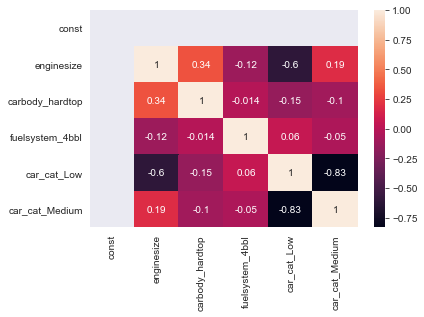

In [78]:
sb.heatmap(X_train_6.corr(),annot=True)

#### car_cat_low and car_cat_medium are having a high co relation , by removing the car_cat_low our R2 score drops significantly so try removing the car_cat_medium and checking the R2 score and p values

In [79]:
###########################################################################################################

In [80]:
X_train_7=X_train_6.drop(["car_cat_Medium"],axis=1)

In [81]:
X_train_7=sm.add_constant(X_train_7)
lm7 = sm.OLS(y_train,X_train_7).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     290.4
Date:                Fri, 01 May 2020   Prob (F-statistic):           3.96e-66
Time:                        22:50:52   Log-Likelihood:                 192.08
No. Observations:                 143   AIC:                            -374.2
Df Residuals:                     138   BIC:                            -359.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1520      0.018      8.461      0.000       0.117       0.188
enginesize          0.7218      0.044     16.291      0.000       0.634       0.809
carbody_hardtop     0.1342      0.035      3.859      0.000       0.065       0.203
fuelsystem_4bbl     0.2287      0.065      3.520      0.001       0.100       0.357
car_cat_Low        -0.1691      0.014    -11.806      0.000      -0.197      -0.141
==============================================================================
Omnibus:                       12.774   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               27.482
Skew:                           0.309   Prob(JB):                     1.08e-06
Kurtosis:                       5.057   Cond. No.                         15.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
vif = pd.DataFrame()
X=X_train_7.drop("const",axis=1)
vif['featues'] = X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,featues,VIF
0,enginesize,1.44
3,car_cat_Low,1.30
1,carbody_hardtop,1.14
2,fuelsystem_4bbl,1.01


#### VIF , P-values and R2 score doesnot drop significatly so we can say that this is our final model built and we will use the above columns for further analysis

# Residual Analysis

### for training

In [83]:
#preidting the values
y_train_pred=lm7.predict(X_train_7)

0.893805084623143

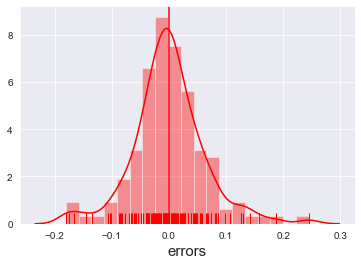

In [99]:
#Finding residuals
res = y_train - y_train_pred
plt.axvline(x=0,color="red")

#distribution of error terms
plt.xlabel("errors",fontsize=15)
sb.distplot(res,rug=True,color='red')
r2_score (y_train, y_train_pred)

The training error (residuals) are not perfectly but almost reside near 0 , so we can say that the distribution is almost close to a normal distribution

### for testing data

In [85]:
#Taking the columns
print(X_train_7.columns)
var=['price', 'enginesize', 'carbody_hardtop', 'fuelsystem_4bbl',
       'car_cat_Low']

Index(['const', 'enginesize', 'carbody_hardtop', 'fuelsystem_4bbl',
       'car_cat_Low'],
      dtype='object')


Scaling the test data

In [86]:
df_test[cols]=scale.transform(df_test[cols])

In [87]:
df_test_var=df_test[var]

making dataframe according to the model created

In [88]:
df_test_var=sm.add_constant(df_test_var)

In [89]:
y_test=df_test_var.pop("price")
X_test_var=df_test_var

In [90]:
X_test_var.head()

,const,enginesize,carbody_hardtop,fuelsystem_4bbl,car_cat_Low
15,1.0,0.542969,0.0,0.0,0.0
9,1.0,0.238281,0.0,0.0,0.0
100,1.0,0.195312,0.0,0.0,1.0
132,1.0,0.199219,0.0,0.0,1.0
68,1.0,0.441406,0.0,0.0,0.0


Predicting the values

In [91]:
y_test_pred=lm7.predict(X_test_var)

Checking the distribution of test error values

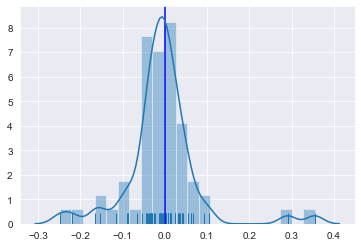

In [92]:
res2 = y_test-y_test_pred
plt.axvline(x=0,color="blue")
sb.distplot(res2,rug=True)

## Model Evaluation

In [102]:
#R2 score of the test data
r2_score (y_test, y_test_pred)

0.8202789958235102

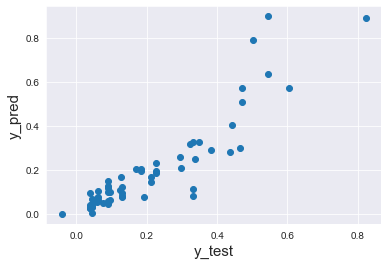

In [103]:
#ploting the y_test and Y-pred values
plt.xlabel("y_test",fontsize=15)
plt.ylabel("y_pred",fontsize=15)
plt.scatter(y_test_pred,y_test)

y_test vs y_pred a is observed to have quite a linear variation, so our overall model is quite good

# Final Inferences

With low vif and p values , these variables can describe the price of the cars upto a good extent

enginesize                                                                                                                     
car_cat_Low                                                                                                                     
carbody_hardtop                                                                                                                 
fuelsystem_4bbl
